In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

In [4]:
data = pd.read_csv ('/content/drive/MyDrive/Data Meaning Dinar 3022310034/Penambangan data pertemuan 10/Rata-rata Pendapatan Bersih Sebulan Pekerja Informal Menurut Kabupaten_Kota dan Lapangan Pekerjaan Utama di Provinsi Jawa Timur (rupiah), 2023.csv')
data.head()

,Kabupaten/Kota,Rata-rata Upah/Gaji Bersih Pekerja Informal berdasarkan Lapangan Pekerjaan Utama Pertanian (Rp),Rata-rata Upah/Gaji Bersih Pekerja Informal berdasarkan Lapangan Pekerjaan Utama Industri (Rp),Rata-rata Upah/Gaji Bersih Pekerja Informal berdasarkan Lapangan Pekerjaan Utama Jasa (Rp),Rata-rata Upah/Gaji Bersih Pekerja Informal berdasarkan Lapangan Pekerjaan Utama Jumlah (Rp)
0,Pacitan,1015606.0,1546789,1401223,1281699
1,Ponorogo,1031817.0,1889235,1338387,1418151
2,Trenggalek,1187282.0,1149711,1409257,1228909
3,Tulungagung,1445261.0,1468050,1604147,1514567
4,Blitar,1215007.0,1495907,1388527,1339073


In [5]:
data

,Kabupaten/Kota,Rata-rata Upah/Gaji Bersih Pekerja Informal berdasarkan Lapangan Pekerjaan Utama Pertanian (Rp),Rata-rata Upah/Gaji Bersih Pekerja Informal berdasarkan Lapangan Pekerjaan Utama Industri (Rp),Rata-rata Upah/Gaji Bersih Pekerja Informal berdasarkan Lapangan Pekerjaan Utama Jasa (Rp),Rata-rata Upah/Gaji Bersih Pekerja Informal berdasarkan Lapangan Pekerjaan Utama Jumlah (Rp)
0,Pacitan,1015606.0,1546789,1401223,1281699
1,Ponorogo,1031817.0,1889235,1338387,1418151
2,Trenggalek,1187282.0,1149711,1409257,1228909
3,Tulungagung,1445261.0,1468050,1604147,1514567
4,Blitar,1215007.0,1495907,1388527,1339073
5,Kediri,1330034.0,1785182,1426208,1449994
6,Malang,1401135.0,2157295,1969151,1776726
7,Lumajang,1050332.0,1710252,1513609,1343326
8,Jember,1014961.0,1462017,1394545,1230888
9,Banyuwangi,1319160.0,1795697,1582608,1531769


In [6]:
indeks_baris_dihapus = [31,34,36]
data = data.drop(indeks_baris_dihapus, axis=0)

In [7]:
data

,Kabupaten/Kota,Rata-rata Upah/Gaji Bersih Pekerja Informal berdasarkan Lapangan Pekerjaan Utama Pertanian (Rp),Rata-rata Upah/Gaji Bersih Pekerja Informal berdasarkan Lapangan Pekerjaan Utama Industri (Rp),Rata-rata Upah/Gaji Bersih Pekerja Informal berdasarkan Lapangan Pekerjaan Utama Jasa (Rp),Rata-rata Upah/Gaji Bersih Pekerja Informal berdasarkan Lapangan Pekerjaan Utama Jumlah (Rp)
0,Pacitan,1015606.0,1546789,1401223,1281699
1,Ponorogo,1031817.0,1889235,1338387,1418151
2,Trenggalek,1187282.0,1149711,1409257,1228909
3,Tulungagung,1445261.0,1468050,1604147,1514567
4,Blitar,1215007.0,1495907,1388527,1339073
5,Kediri,1330034.0,1785182,1426208,1449994
6,Malang,1401135.0,2157295,1969151,1776726
7,Lumajang,1050332.0,1710252,1513609,1343326
8,Jember,1014961.0,1462017,1394545,1230888
9,Banyuwangi,1319160.0,1795697,1582608,1531769


In [8]:
kabupaten_kota = data.iloc[:, 0].values

In [9]:
x = data.iloc[:, 1:5].values

In [10]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [11]:
z = linkage(x_scaled, method='ward', metric='euclidean')

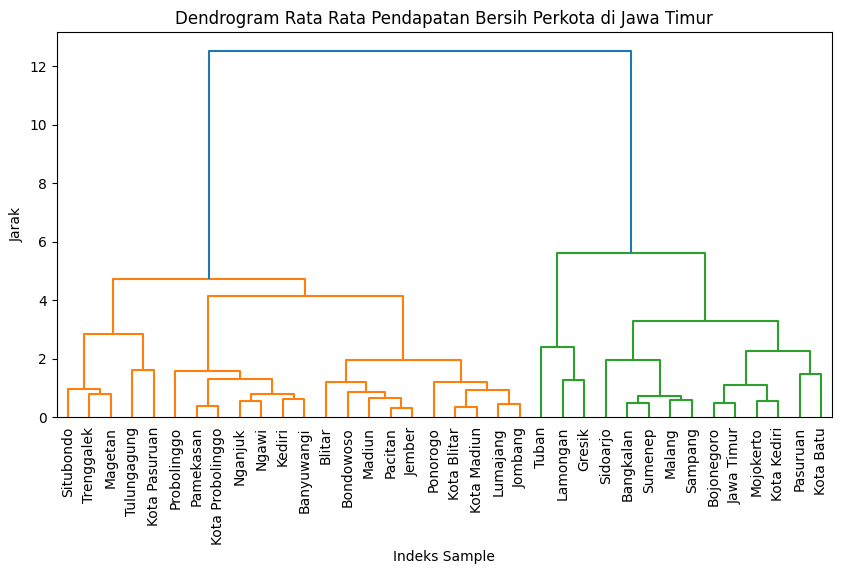

In [12]:
plt.figure(figsize=(10,5))
dendrogram (
z,
orientation='top',
labels=kabupaten_kota,
leaf_rotation=90,
leaf_font_size=10,
)
plt.title('Dendrogram Rata Rata Pendapatan Bersih Perkota di Jawa Timur')
plt.xlabel('Indeks Sample')
plt.ylabel('Jarak')
plt.show()

In [13]:
z_average_euclidean = linkage(x_scaled, method='average', metric='euclidean')

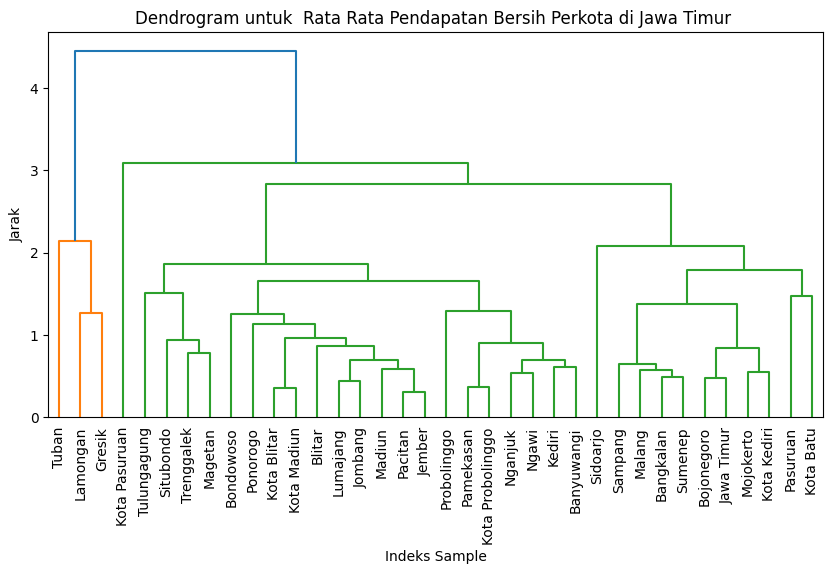

In [14]:
plt.figure(figsize=(10,5))
dendrogram (
z_average_euclidean,
orientation='top',
labels=kabupaten_kota,
leaf_rotation=90,
leaf_font_size=10,
)
plt.title('Dendrogram untuk  Rata Rata Pendapatan Bersih Perkota di Jawa Timur ')
plt.xlabel('Indeks Sample')
plt.ylabel('Jarak')
plt.show()

In [15]:
type(x_scaled)
x_scaled.shape


(36, 4)

In [16]:
import numpy as np
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage

#ini membuat fungsi perhitungan manhattan
def manhattan(u, v):
    return np.sum(np.abs(u - v)) # np sum ini menjumlahkan np.abs (u-v) ini mengurangi semua nilai u dengan v
    #di 2 array data berbeda dan membuat porisitf



dist_manhattan = pdist(x_scaled, metric=manhattan)
z_single_manhattan = linkage(dist_manhattan, method='single')


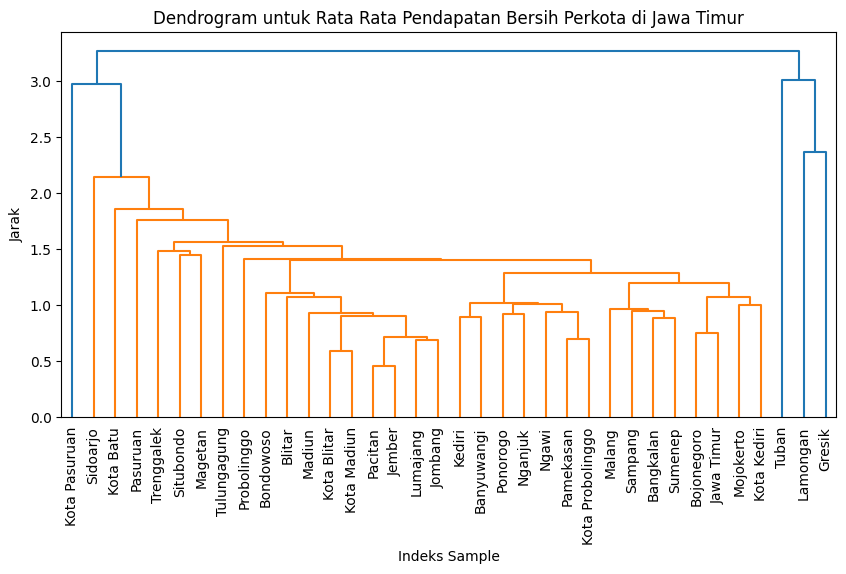

In [17]:
plt.figure(figsize=(10,5))
dendrogram (
z_single_manhattan,
orientation='top',
labels=kabupaten_kota,
leaf_rotation=90,
leaf_font_size=10,
)
plt.title('Dendrogram untuk Rata Rata Pendapatan Bersih Perkota di Jawa Timur')
plt.xlabel('Indeks Sample')
plt.ylabel('Jarak')
plt.show()

In [18]:
clusters = fcluster(z, t=3, criterion='maxclust')
data ['Cluster'] = clusters
data.tail()

,Kabupaten/Kota,Rata-rata Upah/Gaji Bersih Pekerja Informal berdasarkan Lapangan Pekerjaan Utama Pertanian (Rp),Rata-rata Upah/Gaji Bersih Pekerja Informal berdasarkan Lapangan Pekerjaan Utama Industri (Rp),Rata-rata Upah/Gaji Bersih Pekerja Informal berdasarkan Lapangan Pekerjaan Utama Jasa (Rp),Rata-rata Upah/Gaji Bersih Pekerja Informal berdasarkan Lapangan Pekerjaan Utama Jumlah (Rp),Cluster
32,Kota Probolinggo,1213163.0,2055093,1604726,1602592,1
33,Kota Pasuruan,1781239.0,1137283,1754558,1610445,1
35,Kota Madiun,946704.0,1577189,1504429,1498195,1
37,Kota Batu,1833145.0,1947182,1821755,1851333,3
38,Jawa Timur,1262964.0,1834985,1862536,1647962,3


**METODE K MEANS**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [20]:
kabupaten_kota = data.iloc[:, 0].values

In [21]:
data

,Kabupaten/Kota,Rata-rata Upah/Gaji Bersih Pekerja Informal berdasarkan Lapangan Pekerjaan Utama Pertanian (Rp),Rata-rata Upah/Gaji Bersih Pekerja Informal berdasarkan Lapangan Pekerjaan Utama Industri (Rp),Rata-rata Upah/Gaji Bersih Pekerja Informal berdasarkan Lapangan Pekerjaan Utama Jasa (Rp),Rata-rata Upah/Gaji Bersih Pekerja Informal berdasarkan Lapangan Pekerjaan Utama Jumlah (Rp),Cluster
0,Pacitan,1015606.0,1546789,1401223,1281699,1
1,Ponorogo,1031817.0,1889235,1338387,1418151,1
2,Trenggalek,1187282.0,1149711,1409257,1228909,1
3,Tulungagung,1445261.0,1468050,1604147,1514567,1
4,Blitar,1215007.0,1495907,1388527,1339073,1
5,Kediri,1330034.0,1785182,1426208,1449994,1
6,Malang,1401135.0,2157295,1969151,1776726,3
7,Lumajang,1050332.0,1710252,1513609,1343326,1
8,Jember,1014961.0,1462017,1394545,1230888,1
9,Banyuwangi,1319160.0,1795697,1582608,1531769,1


In [22]:
x = data.iloc[:, 1:5].values

In [23]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [24]:
inertias = []
K = range(1, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit (x_scaled)
    inertias.append(model.inertia_)

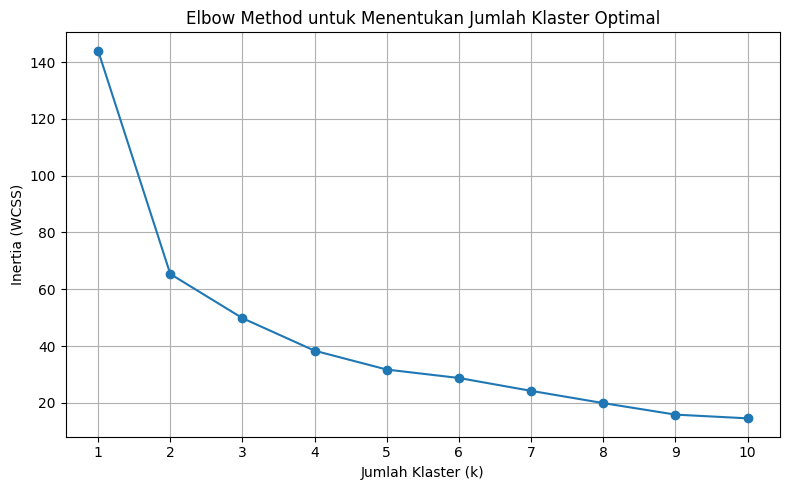

In [25]:
plt.figure(figsize=(8,5))
plt.plot(K, inertias, marker='o')
plt.title('Elbow Method untuk Menentukan Jumlah Klaster Optimal')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(K)
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(x_scaled)

In [27]:
data['Cluster'] = clusters_kmeans
data.tail()

,Kabupaten/Kota,Rata-rata Upah/Gaji Bersih Pekerja Informal berdasarkan Lapangan Pekerjaan Utama Pertanian (Rp),Rata-rata Upah/Gaji Bersih Pekerja Informal berdasarkan Lapangan Pekerjaan Utama Industri (Rp),Rata-rata Upah/Gaji Bersih Pekerja Informal berdasarkan Lapangan Pekerjaan Utama Jasa (Rp),Rata-rata Upah/Gaji Bersih Pekerja Informal berdasarkan Lapangan Pekerjaan Utama Jumlah (Rp),Cluster
32,Kota Probolinggo,1213163.0,2055093,1604726,1602592,1
33,Kota Pasuruan,1781239.0,1137283,1754558,1610445,1
35,Kota Madiun,946704.0,1577189,1504429,1498195,2
37,Kota Batu,1833145.0,1947182,1821755,1851333,0
38,Jawa Timur,1262964.0,1834985,1862536,1647962,1


In [28]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

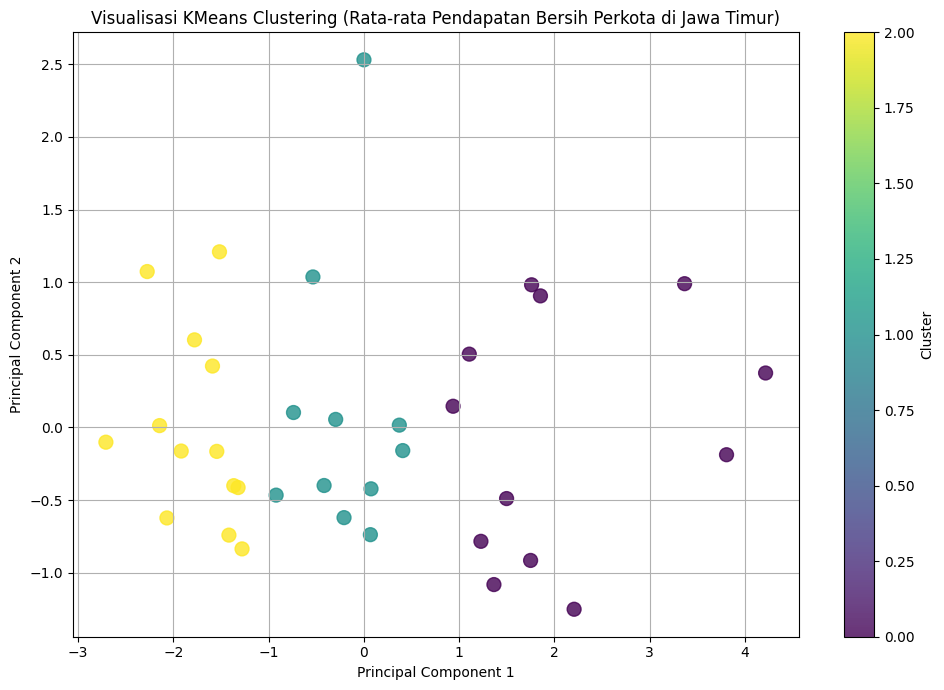

In [30]:
plt.figure(figsize=(10,7))
scatter = plt.scatter(x_pca[:,0], x_pca[:,1], c=clusters_kmeans, cmap='viridis', s=100, alpha=0.8)

# # Annotate points with 'Kabupaten/Kota' names
# for i, txt in enumerate(kabupaten_kota):
#     plt.annotate(txt, (x_pca[i, 0], x_pca[i, 1]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

plt.title('Visualisasi KMeans Clustering (Rata-rata Pendapatan Bersih Perkota di Jawa Timur)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()